<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/MatematicasParaIA/5_Optimizacion/ejercicios/ejercicios_optimizacion.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

# Ejercicio 1: Método de la bisección

Implementar el método de la bisección. Debe tomar como argumentos, la función a evaluar, el intervalo inicial, y los criterios de corte. Debe devolver el valor  hallado.

Recordar que la formulación del método tiene como objetivo encontrar $\color{orange}{x}$ que iguale a cero una ecuación.

Hint: usar como base el pseudocódigo provisto en la teórica

<center>
<img src="http://www.frsn.utn.edu.ar/gie/an/enl/Metodobiseccion.gif">
</center>

In [ ]:
# completa tu codigo aca

def bisection(f, interval0, MAXITER, TOL):
    pass

# Ejercicio 2:

Usar el método de la bisección para resolver el siguiente problema 

$$
\color{orange}{x^6-4x^5+\sin (x)-e^x+\pi =0}
$$

Graficar la función en el intervalo $\color{orange}{[-1,1]}$ y usar este intervalo como el inicial 

Usar `numpy`  y `matplotlib`.


In [ ]:
# completa tu código acá


# Ejercicio 3

Modificar el método `fit` de la clase `LinearRegression` para poder guardar el historial del valores de la función error. Graficar el error en función del tiempo.


In [216]:
# completa tu código acá

class LinearRegression:
    def __init__(self, add_bias=True): 
        self.add_bias = add_bias #el bias es la constante de nuestro modelo lineal
        pass
            
    def fit(self, x, y, optimizer):
        
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)]) 
        
        N,D = x.shape
        
        def gradient(x, y, betas):                          
            yh =  x @ betas # la operación calcula el producto matricial
            N, D = x.shape 
            grad = -2*np.dot(y-yh, x)/N
            return grad
        
        betas0 = np.zeros(D) #betas iniciales                                
        self.betas = optimizer.run(gradient, x, y, betas0) #corremos el optimizador  
        
        #####
        
        def MSE(y,yh):
            e = (y-yh)**2
            return np.mean(e)
        
        def get_error_history(x,y,history_betas):
            error_history = []
            for betas in history_betas:
                yh = x@betas
                error_history.append(MSE(y,yh))
            return error_history
        
        self.error_history = get_error_history(x,y,optimizer.w_history)        
        
        return self
    
    def predict(self, x):
        if self.add_bias: 
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.betas
        return yh

In [215]:
# esta celda permanece igual 


class GradientDescent:
        
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False):
        
        """
        Inicializador
        
        Parámetros
        ----------
        learning_rate (float, opcional): Ritmo de aprendizaje. Default a .001
        max_iters (int, opcional): Máximas iteraciones. Default a 1E4.
        epsilon (float, opcional): Cóta mínimma para el valor del gradiente permitido. Default a 1E-8
        record_history (bool, opcional): Si es True guarda el historial de los pesos para cada paso de iteración. Default a False
        """
        
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 
            
    def run(self, gradient_fn, x, y, w):
        """
        Método iterativo de gradiente descendiente. 
        
        Parámetros
        ----------
        gradient_fn (function): gradiente de la función costo a minimizar. Debe tomar como parámetros x,y y los pesos correspondientes.
        x (numpy.ndarray): variables independientes del conjunto de datos.
        y (numpy.ndarray): variables dependientes observadas
        w (numpy.ndarray): variables a entrenar del modelo 

        Devuelve
        --------
            w (numpy.ndarray): variables resultaantes luego del proceso de entrenamiento.
        """
        
        grad = np.inf # definimos el gradiente como infinito para que se cumpla la condicion y se ingresse al while
        t = 1 # contador
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters: #linalg.norm calcula la norma  L2 del vector gradiente
            grad = gradient_fn(x, y, w) #calculamos el gradiente               
            w = w - self.learning_rate * grad #acá esta la papa        
            if self.record_history: 
                self.w_history.append(w)
            t += 1
        return w


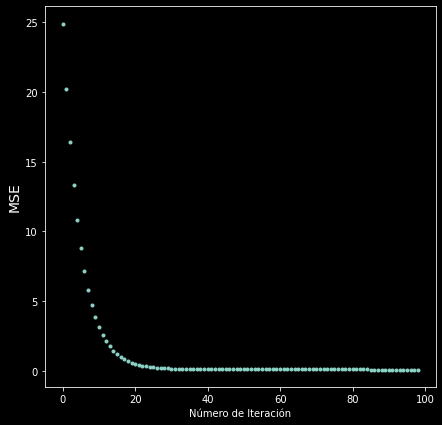

In [219]:
b0_true = 5
b1_true = 0.7
x_rl = np.linspace(-1,1,100)
y_rl = x_rl*b1_true + b0_true + np.random.random(x_rl.shape)

optimizer = GradientDescent(learning_rate=.05, max_iters=100, record_history=True) 
model = LinearRegression() #inicializamos nuestro objeto regresion 
model.fit(x_rl,y_rl, optimizer) #entrenamos el modelo

_ = plt.figure(figsize=(7,7))

#completar el plot
# _ = plt.plot(..., '.')

_ = plt.ylabel('MSE', fontsize=14)
_ = plt.xlabel("Número de Iteración")

# Ejercicio 4

Modificar el método  `run` de la clase `GradientDescent` para guardar el valor del gradiente en cada paso del entrenamiento. Graficar la evolución del mismo.

In [ ]:
# completa tu código acá

class GradientDescent:
        
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False):
        
        """
        Inicializador
        
        Parámetros
        ----------
        learning_rate (float, opcional): Ritmo de aprendizaje. Default a .001
        max_iters (int, opcional): Máximas iteraciones. Default a 1E4.
        epsilon (float, opcional): Cóta mínimma para el valor del gradiente permitido. Default a 1E-8
        record_history (bool, opcional): Si es True guarda el historial de los pesos para cada paso de iteración. Default a False
        """
        
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []
            
    def run(self, gradient_fn, x, y, w):
        """
        Método iterativo de gradiente descendiente. 
        
        Parámetros
        ----------
        gradient_fn (function): gradiente de la función costo a minimizar. Debe tomar como parámetros x,y y los pesos correspondientes.
        x (numpy.ndarray): variables independientes del conjunto de datos.
        y (numpy.ndarray): variables dependientes observadas
        w (numpy.ndarray): variables a entrenar del modelo 

        Devuelve
        --------
            w (numpy.ndarray): variables resultaantes luego del proceso de entrenamiento.
        """
        
        grad = np.inf # definimos el gradiente como infinito para que se cumpla la condicion y se ingresse al while
        t = 1 # contador
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters: #linalg.norm calcula la norma  L2 del vector gradiente
            grad = gradient_fn(x, y, w) #calculamos el gradiente               
            w = w - self.learning_rate * grad #acá esta la papa        
            if self.record_history: 
                self.w_history.append(w)
            t += 1
        return w


In [ ]:
b0_true = 5
b1_true = 0.7
x_rl = np.linspace(-1,1,100)
y_rl = x_rl*b1_true + b0_true + np.random.random(x_rl.shape)

optimizer = GradientDescent(learning_rate=.05, max_iters=100, record_history=True) 
model = LinearRegression() #inicializamos nuestro objeto regresion 
model.fit(x_rl,y_rl, optimizer) #entrenamos el modelo

_ = plt.figure(figsize=(7,7))

#completa tu código aca para graficar
# _ = plt.plot(...  , '.')

_ = plt.ylabel('Norma del gradiente', fontsize=14)
_ = plt.xlabel("Número de Iteración")

# Ejercicio 5

Implementar  un método que determine si la figura geométrica de un disco de radio 1 es convexa.


### Paso 1

Implementar una función que permita determinar si un punto pertenece al conjunto definido como Disco.

$$
\color{orange}{D = \{(x,y) \ : \ \|(x,y)\|_2 \leq 1 \}}
$$


In [ ]:
def in_disk(x, y, radius=1):
    pass

### Paso 2

Implementar una función que dos puntos, y construya una recta (la recta va a ser una serie de puntos pertenecientes a la recta). 


In [64]:
# completa tu código acá

def build_line(x1, y1, x2, y2, NUM_POINTS=100):
    pass

### Paso 3

Implementar el método que chequee si los puntos pertenecientes a la recta pertenecen al conjunto disco. Usar puntos aleatorios asegurandose que caigan dentro de un círculo de radio 1. Esto es fácil usando coordenadas polares. Más info <a href="https://es.wikipedia.org/wiki/Coordenadas_polares"> acá</a>

In [78]:
# completa tu código acá
def is_disk_convex(NUM_POINTS = 100):
    pass